In [2]:
# making 5 or not classifier
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
x,y=mnist['data'],mnist['target']

In [4]:
x.shape
print(type(x))
print(x.iloc[0].shape if hasattr(x, 'iloc') else "iloc not available")

<class 'pandas.core.frame.DataFrame'>
(784,)


(-0.5, 27.5, 27.5, -0.5)

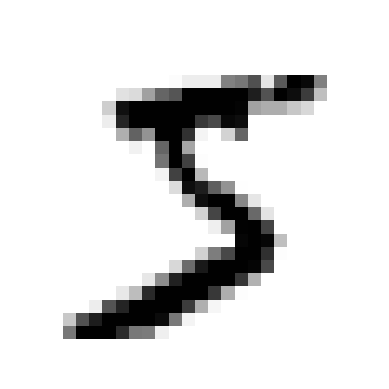

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = x.iloc[0]
some_digit_image = some_digit.to_numpy().reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
# plt.show()

In [6]:
# converting into integer

In [7]:
y=y.astype(np.uint8)

In [8]:
x_train,x_test,y_train, y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [9]:
y_train_5=(y_train==5)

In [10]:
y_test_5=(y_test==5)

In [11]:
from sklearn.linear_model import SGDClassifier


In [12]:
sgd_clf=SGDClassifier(random_state=42)

In [13]:
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [14]:
# sgd_clf.predict([some_digit])

In [15]:
#  from sklearn.model_selection import cross_val_predict
# y_train_predict=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

In [16]:
# from sklearn.metrics import confusion_matrix 
# confusion_matrix(y_train_5,y_train_predict)

In [17]:
# # sklearn provides the standard function to  calculate precision and recall
# from sklearn.metrics import precision_score , recall_score
# precision_score(y_train_5,y_train_predict)

In [18]:
# recall_score(y_train_5,y_train_predict
            
#             )

In [19]:
#  # from sklearn.metrics import f1_score
# f1_score(y_train_5,y_train_predict)

In [20]:
# this is done by some standaerd function also
y_scores = sgd_clf.decision_function([some_digit])
y_scores


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [21]:
threshold=0

In [22]:
y_some_digit_pred=(y_scores>threshold)

In [23]:
y_some_digit_pred

array([ True])

In [24]:
threshold=8000

In [25]:
y_some_digit_pred=(y_scores>threshold)

In [26]:
y_some_digit_pred
y_train_5 = y_train_5.astype(int)  # Convert boolean to integers (True -> 1, False -> 0)


In [27]:
y_train_5

0        1
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    1
59998    0
59999    0
Name: class, Length: 60000, dtype: int32

In [32]:
from sklearn.model_selection import cross_val_predict
y_scores=cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method="decision_function")



In [29]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [30]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


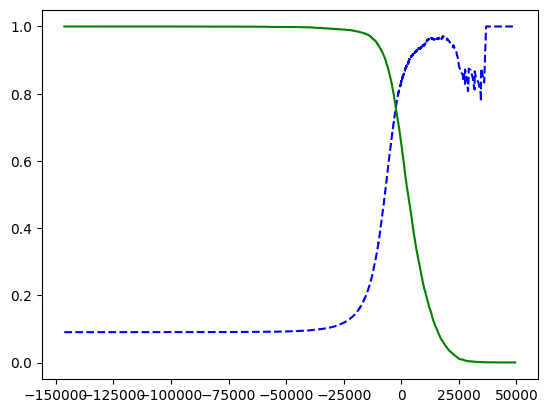

In [31]:
def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label="precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

plot_precision_recall_vs_thresholds(precisions,recalls, thresholds)
plt.show()